<h1>INSURANCE PREMIUM PREDICTION</h1>

##### Regression Problem statement ----> linear regression , decision tree algo , random forest algo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>1. Reading dataframe</h1>

In [3]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# df=pd.read_csv("https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv")
# df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h1>2. Analysing dataframe for various columns</h1>

In [6]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [9]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
df["charges"].mean()

np.float64(13270.422265141257)

<h1>3. Filtering data for male and female candidates</h1>

In [11]:
male=df[df["sex"]=="male"]
male

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [12]:
female=df[df["sex"]=="female"]
female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [13]:
print("average charges from female candidates",female["charges"].mean())
print("average charges from male candidates",male["charges"].mean())

average charges from female candidates 12569.578843835347
average charges from male candidates 13956.751177721893


<h1>4. Creating new dataframe by filtering mean charges for female candidates</h1>
<p>population data and sample data, statistics , population data and sample data mean are almost equal</p>

In [14]:
df2=female[female["charges"]<=female["charges"].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [15]:
df2["smoker"].value_counts()

smoker
no    441
Name: count, dtype: int64

In [16]:
df2["children"].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [17]:
df2["region"].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [18]:
df2["age"].value_counts()

age
18    27
19    22
38    13
31    12
49    12
48    12
41    12
54    12
28    12
51    12
45    11
26    11
22    11
21    11
24    11
56    11
46    11
34    11
50    11
39    11
36    11
30    10
25    10
33    10
55    10
29    10
42    10
32    10
58    10
20    10
35     9
52     9
53     9
47     9
44     9
40     8
37     6
27     6
57     6
43     6
23     5
59     2
Name: count, dtype: int64

<h1>5. Feature engineering , Grouping and Analysing of data based on bmi column<h1>



In [19]:
ls=list(df["bmi"])
ls

[27.9,
 33.77,
 33.0,
 22.705,
 28.88,
 25.74,
 33.44,
 27.74,
 29.83,
 25.84,
 26.22,
 26.29,
 34.4,
 39.82,
 42.13,
 24.6,
 30.78,
 23.845,
 40.3,
 35.3,
 36.005,
 32.4,
 34.1,
 31.92,
 28.025,
 27.72,
 23.085,
 32.775,
 17.385,
 36.3,
 35.6,
 26.315,
 28.6,
 28.31,
 36.4,
 20.425,
 32.965,
 20.8,
 36.67,
 39.9,
 26.6,
 36.63,
 21.78,
 30.8,
 37.05,
 37.3,
 38.665,
 34.77,
 24.53,
 35.2,
 35.625,
 33.63,
 28.0,
 34.43,
 28.69,
 36.955,
 31.825,
 31.68,
 22.88,
 37.335,
 27.36,
 33.66,
 24.7,
 25.935,
 22.42,
 28.9,
 39.1,
 26.315,
 36.19,
 23.98,
 24.75,
 28.5,
 28.1,
 32.01,
 27.4,
 34.01,
 29.59,
 35.53,
 39.805,
 32.965,
 26.885,
 38.285,
 37.62,
 41.23,
 34.8,
 22.895,
 31.16,
 27.2,
 27.74,
 26.98,
 39.49,
 24.795,
 29.83,
 34.77,
 31.3,
 37.62,
 30.8,
 38.28,
 19.95,
 19.3,
 31.6,
 25.46,
 30.115,
 29.92,
 27.5,
 28.025,
 28.4,
 30.875,
 27.94,
 35.09,
 33.63,
 29.7,
 30.8,
 35.72,
 32.205,
 28.595,
 49.06,
 27.94,
 27.17,
 23.37,
 37.1,
 23.75,
 28.975,
 31.35,
 33.915,
 28.78

In [20]:
label = []
for i in ls:
    if i<18.5:
        label.append("underweight")
    elif (i>18.5 and i<24.9):
        label.append("healthyweight")
    elif (i>25.0 and i<29.9):
        label.append("overweight")
        
    else:
        label.append("obese")    
label

['overweight',
 'obese',
 'obese',
 'healthyweight',
 'overweight',
 'overweight',
 'obese',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'obese',
 'obese',
 'obese',
 'healthyweight',
 'obese',
 'healthyweight',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'overweight',
 'overweight',
 'healthyweight',
 'obese',
 'underweight',
 'obese',
 'obese',
 'overweight',
 'overweight',
 'overweight',
 'obese',
 'healthyweight',
 'obese',
 'healthyweight',
 'obese',
 'obese',
 'overweight',
 'obese',
 'healthyweight',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'healthyweight',
 'obese',
 'obese',
 'obese',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'obese',
 'obese',
 'healthyweight',
 'obese',
 'overweight',
 'obese',
 'healthyweight',
 'overweight',
 'healthyweight',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'healthyweight',
 'healthyweight',
 'overweight',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'overweight',


In [21]:
len(label)

1338

In [22]:
df["weight"]=label

In [23]:
df

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


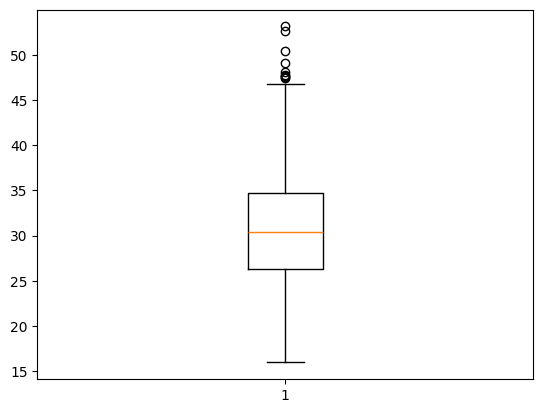

In [24]:
plt.boxplot(df["bmi"])
plt.show()

In [25]:
group=(df.groupby(by="weight"))
group

In [26]:
health_analysis=group['charges'].agg(min="min",max="max",mean="mean")
health_analysis

,min,max,mean
weight,,,
healthyweight,1121.8739,35069.37452,10404.900084
obese,1131.5066,63770.42801,15420.399577
overweight,1252.4070,38245.59327,11020.183782
underweight,1621.3402,32734.18630,8852.200585


In [27]:
health_analysis.sort_values("min")

,min,max,mean
weight,,,
healthyweight,1121.8739,35069.37452,10404.900084
obese,1131.5066,63770.42801,15420.399577
overweight,1252.4070,38245.59327,11020.183782
underweight,1621.3402,32734.18630,8852.200585


In [28]:
health_classes=list(health_analysis.index)
health_classes

['healthyweight', 'obese', 'overweight', 'underweight']

In [29]:
average_charges=health_analysis["mean"].values
average_charges

array([10404.90008389, 15420.39957727, 11020.18378226,  8852.200585  ])

<h1>6.Chart repesentation for weight column</h1>

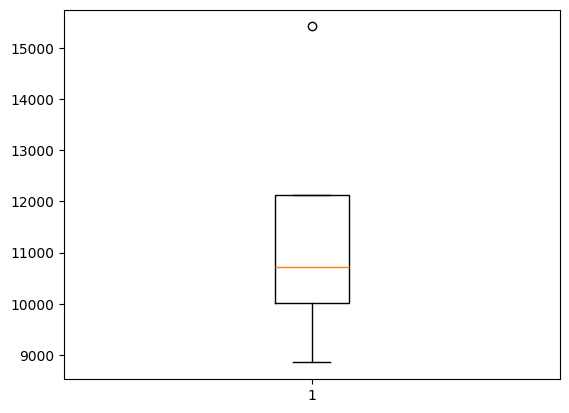

In [30]:
plt.boxplot(average_charges)
plt.show()

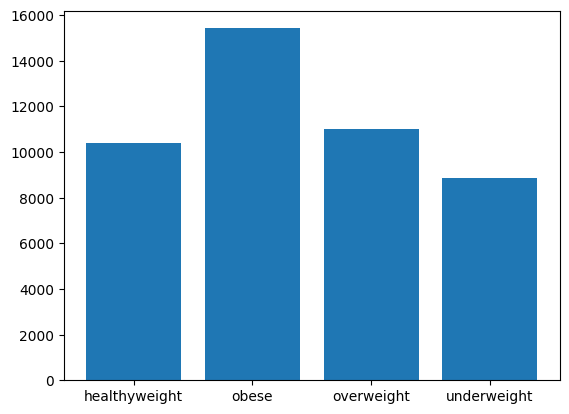

In [31]:
plt.bar(health_classes,average_charges)
plt.show()

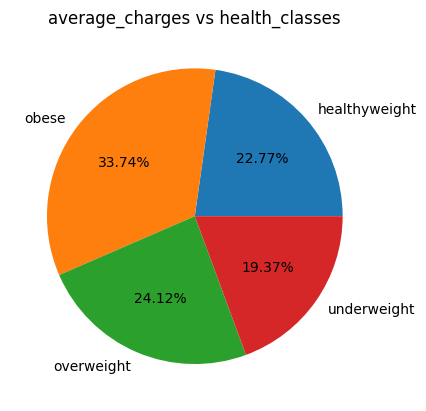

In [32]:
plt.pie(average_charges,labels=health_classes,autopct="%1.2f%%")
plt.title("average_charges vs health_classes")
plt.show()

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


<h1>7. Grouping and Analysing data based on region column</h1>

In [34]:
region_group=(df.groupby(by="region"))
region_group

In [35]:
region_analysis=region_group['charges'].agg(min="min",max="max",mean="mean")
region_analysis

,min,max,mean
region,,,
northeast,1694.7964,58571.07448,13406.384516
northwest,1621.3402,60021.39897,12417.575374
southeast,1121.8739,63770.42801,14735.411438
southwest,1241.5650,52590.82939,12346.937377


In [36]:
region_classes=list(region_analysis.index)
region_classes


['northeast', 'northwest', 'southeast', 'southwest']

In [37]:
region_charges=region_analysis["mean"].values
region_charges

array([13406.38451639, 12417.57537397, 14735.41143761, 12346.93737729])

<h1>8. Graphical representation of region group</h1>

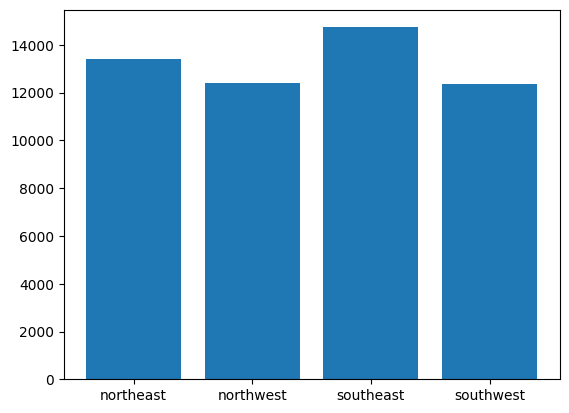

In [38]:
plt.bar(region_classes,region_charges)
plt.show()

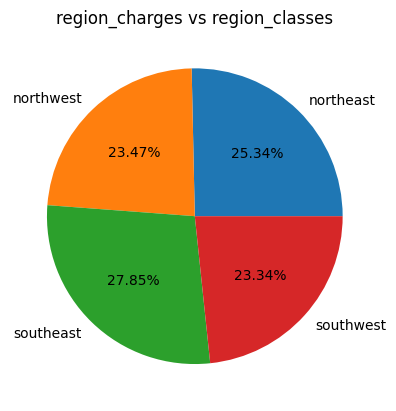

In [39]:
plt.pie(region_charges,labels=region_classes,autopct="%1.2f%%")
plt.title("region_charges vs region_classes")
plt.show()

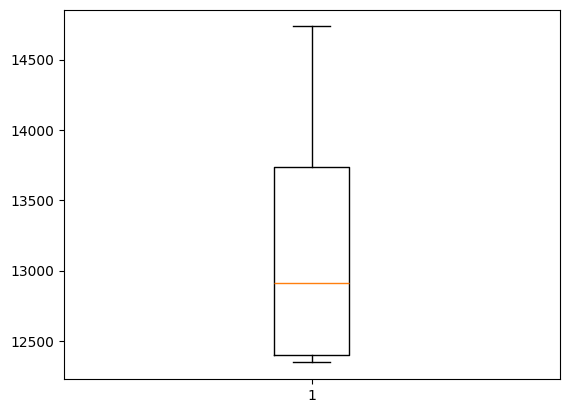

In [40]:
plt.boxplot(region_charges)
plt.show()

In [41]:
df

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


<h1>9. Grouping and Analysing data based on gender</h1>

In [42]:
group_gender=df.groupby(by="sex")
group_gender

In [43]:
gender_analysis=group_gender["charges"].agg(min="min",max="max",mean="mean")
gender_analysis

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


In [44]:
gender_classes=list(gender_analysis.index)
gender_classes

['female', 'male']

In [45]:
gender_charges=gender_analysis["mean"].values
gender_charges

array([12569.57884384, 13956.75117772])

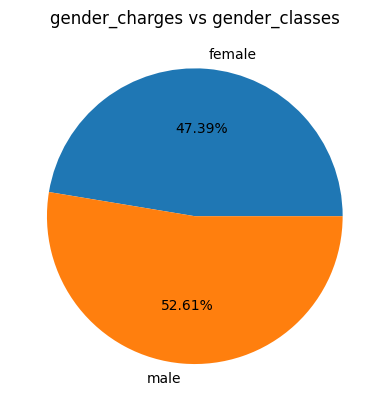

In [46]:
plt.pie(gender_charges,labels=gender_classes,autopct="%1.2f%%")
plt.title("gender_charges vs gender_classes")
plt.show()

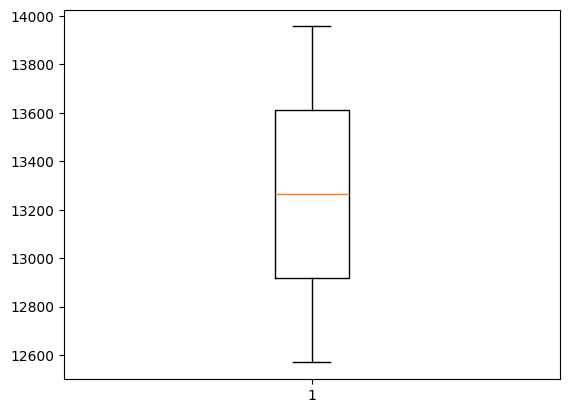

In [47]:
plt.boxplot(gender_charges)
plt.show()

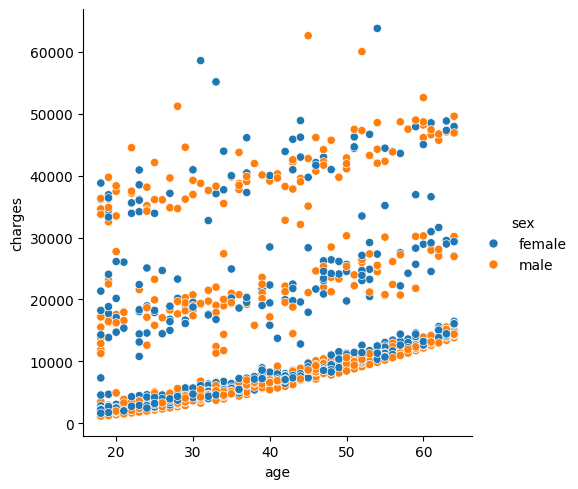

In [48]:
sns.relplot(x="age",y="charges",data=df,hue="sex")
plt.show()

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [50]:
df["age"].max()

np.int64(64)

In [51]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<h1>10.Grouping and Analysing data for female based on different age group </h1>

In [52]:
age_list = list(female["age"])
age_list

[19,
 31,
 46,
 37,
 60,
 62,
 56,
 52,
 60,
 30,
 34,
 59,
 63,
 55,
 18,
 19,
 62,
 24,
 31,
 37,
 18,
 28,
 60,
 18,
 21,
 40,
 58,
 53,
 34,
 28,
 20,
 19,
 61,
 40,
 27,
 53,
 29,
 22,
 41,
 45,
 48,
 37,
 57,
 56,
 46,
 55,
 21,
 53,
 64,
 28,
 54,
 41,
 18,
 61,
 34,
 19,
 55,
 21,
 29,
 49,
 37,
 20,
 47,
 26,
 19,
 52,
 32,
 59,
 61,
 53,
 20,
 22,
 54,
 22,
 29,
 51,
 53,
 32,
 42,
 40,
 50,
 42,
 18,
 32,
 20,
 32,
 19,
 35,
 24,
 63,
 46,
 41,
 18,
 44,
 26,
 30,
 41,
 29,
 36,
 56,
 39,
 45,
 51,
 64,
 19,
 48,
 60,
 27,
 28,
 63,
 34,
 45,
 41,
 53,
 26,
 24,
 34,
 53,
 58,
 41,
 42,
 59,
 19,
 40,
 18,
 23,
 33,
 55,
 63,
 60,
 63,
 55,
 38,
 58,
 20,
 53,
 59,
 47,
 22,
 51,
 40,
 55,
 52,
 46,
 63,
 59,
 28,
 22,
 48,
 53,
 56,
 28,
 57,
 28,
 30,
 41,
 19,
 27,
 44,
 26,
 27,
 64,
 61,
 61,
 56,
 43,
 46,
 24,
 60,
 49,
 34,
 36,
 57,
 50,
 30,
 18,
 18,
 48,
 19,
 21,
 21,
 49,
 56,
 42,
 61,
 57,
 42,
 23,
 39,
 64,
 27,
 35,
 58,
 26,
 24,
 19,
 46,
 43,
 18,
 51,


In [53]:
new_age_list = []
for i in age_list:
    if i >=18 and i<=25 :
        new_age_list.append("youth")
    elif i>25 and i<=40 :
        new_age_list.append("adult")
    elif i>40 and i<=64:
        new_age_list.append("oldage")
new_age_list    

['youth',
 'adult',
 'oldage',
 'adult',
 'oldage',
 'oldage',
 'oldage',
 'oldage',
 'oldage',
 'adult',
 'adult',
 'oldage',
 'oldage',
 'oldage',
 'youth',
 'youth',
 'oldage',
 'youth',
 'adult',
 'adult',
 'youth',
 'adult',
 'oldage',
 'youth',
 'youth',
 'adult',
 'oldage',
 'oldage',
 'adult',
 'adult',
 'youth',
 'youth',
 'oldage',
 'adult',
 'adult',
 'oldage',
 'adult',
 'youth',
 'oldage',
 'oldage',
 'oldage',
 'adult',
 'oldage',
 'oldage',
 'oldage',
 'oldage',
 'youth',
 'oldage',
 'oldage',
 'adult',
 'oldage',
 'oldage',
 'youth',
 'oldage',
 'adult',
 'youth',
 'oldage',
 'youth',
 'adult',
 'oldage',
 'adult',
 'youth',
 'oldage',
 'adult',
 'youth',
 'oldage',
 'adult',
 'oldage',
 'oldage',
 'oldage',
 'youth',
 'youth',
 'oldage',
 'youth',
 'adult',
 'oldage',
 'oldage',
 'adult',
 'oldage',
 'adult',
 'oldage',
 'oldage',
 'youth',
 'adult',
 'youth',
 'adult',
 'youth',
 'adult',
 'youth',
 'oldage',
 'oldage',
 'oldage',
 'youth',
 'oldage',
 'adult',
 'adul

In [54]:
len(new_age_list)

662

In [55]:
female["age_label"]=new_age_list

C:\Users\hp\AppData\Local\Temp\ipykernel_20132\3633090233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female["age_label"]=new_age_list


In [56]:
df

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [57]:
group_age = female.groupby(by="age_label")
group_age

In [58]:
age_analysis= group_age["charges"].agg(min="min",max="max",mean="mean")
age_analysis

,min,max,mean
age_label,,,
adult,2974.1260,58571.07448,10135.871487
oldage,6185.3208,63770.42801,15870.294140
youth,1607.5101,40904.19950,8573.725900


In [59]:
age_classes = list(age_analysis.index)
age_classes

['adult', 'oldage', 'youth']

In [60]:
min_age_charges = age_analysis["min"].values
min_age_charges

array([2974.126 , 6185.3208, 1607.5101])

In [61]:
max_age_charges = age_analysis["max"].values
max_age_charges

array([58571.07448, 63770.42801, 40904.1995 ])

In [62]:
mean_age_charges = age_analysis["mean"].values
mean_age_charges

array([10135.87148701, 15870.29413978,  8573.72589979])

<h1>11. Graphical representation for different age classes</h1>

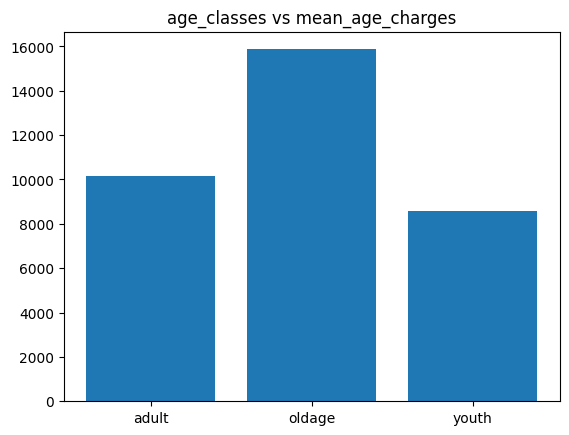

In [63]:
plt.bar(age_classes,mean_age_charges)
plt.title("age_classes vs mean_age_charges")
plt.show()

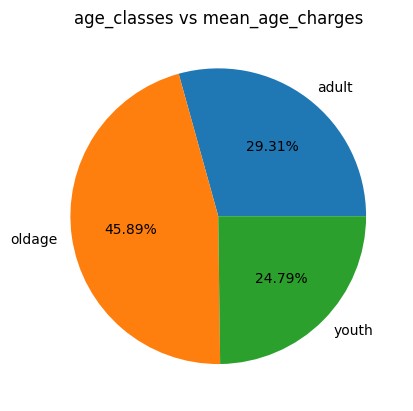

In [64]:
plt.pie(mean_age_charges,labels=age_classes,autopct="%1.2f%%")
plt.title("age_classes vs mean_age_charges")
plt.show()

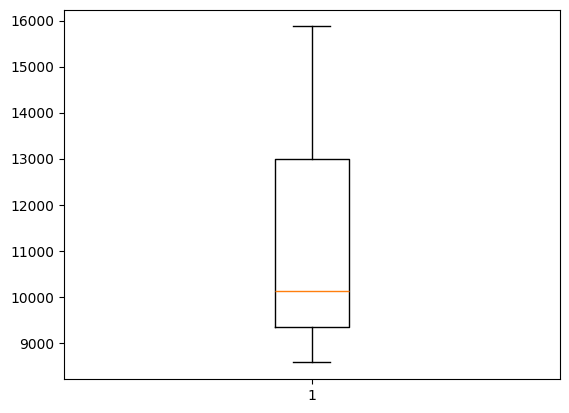

In [65]:
plt.boxplot(mean_age_charges)
plt.show()

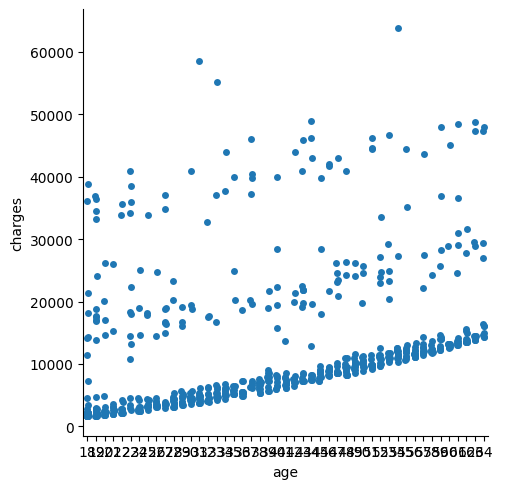

In [66]:
sns.catplot(x="age",y="charges",data=female)
plt.show()

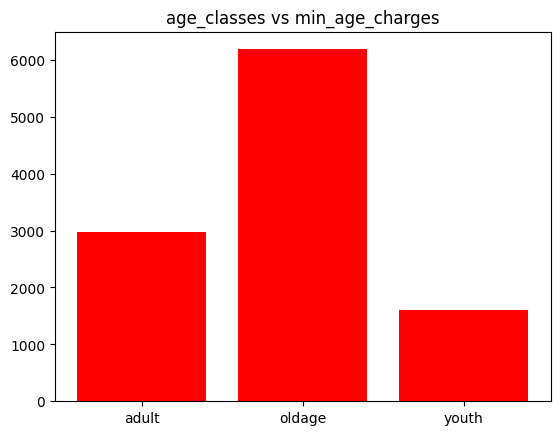

In [67]:
plt.bar(age_classes,min_age_charges,color = "red")
plt.title("age_classes vs min_age_charges")
plt.show()

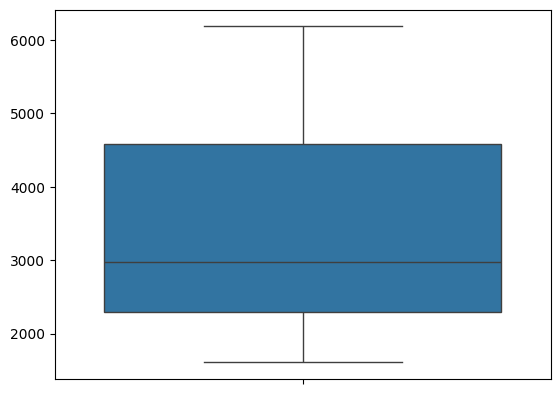

In [68]:
sns.boxplot(min_age_charges)
plt.show()

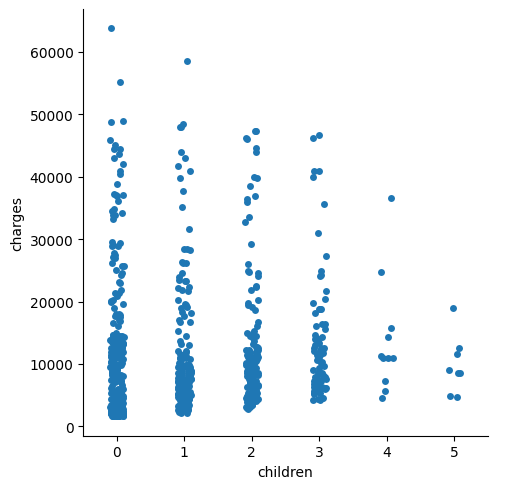

In [69]:
sns.catplot(x="children",y="charges",data=female)
plt.show()

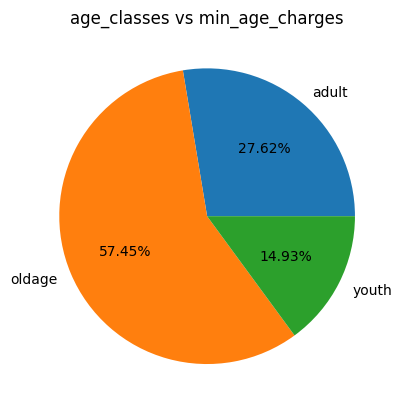

In [70]:
plt.pie(min_age_charges,labels=age_classes,autopct="%1.2f%%")
plt.title("age_classes vs min_age_charges")
plt.show()

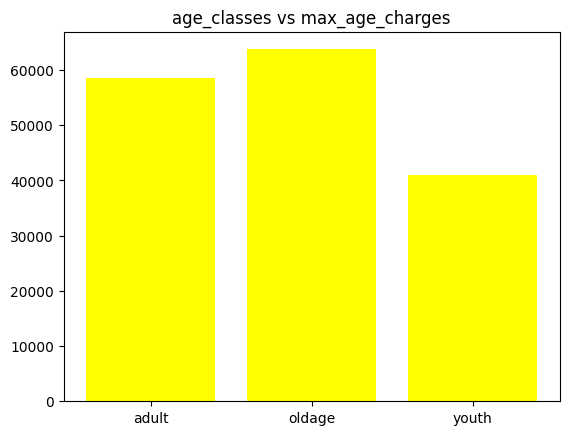

In [71]:
plt.bar(age_classes,max_age_charges, color ="yellow")
plt.title("age_classes vs max_age_charges")
plt.show()

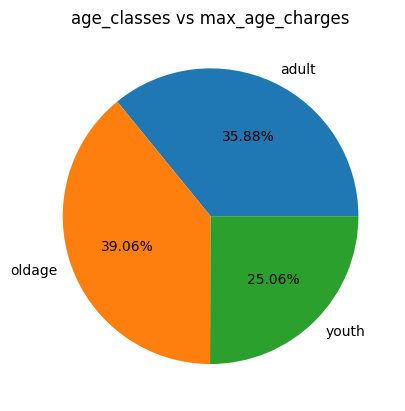

In [72]:
plt.pie(max_age_charges,labels=age_classes,autopct="%1.2f%%")
plt.title("age_classes vs max_age_charges")
plt.show()

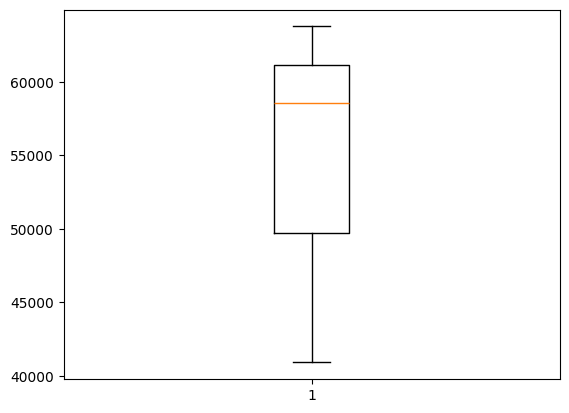

In [73]:
plt.boxplot(max_age_charges)
plt.show()

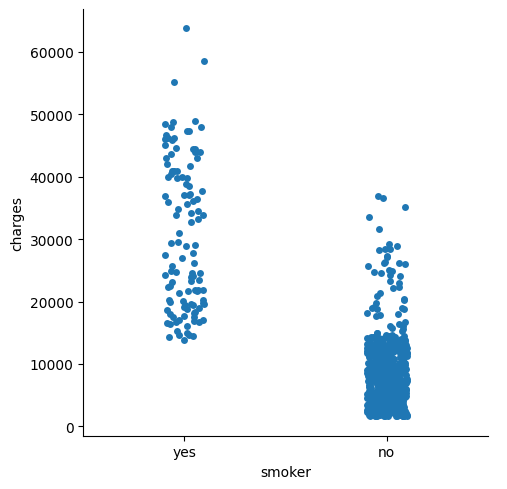

In [74]:
sns.catplot(x="smoker",y="charges",data=female)
plt.show()

<h1>12.Filtering and ploting data by converting categorical columns into numerical columns . </h1>
<p>OneHot encoding ---> 0 and 1 form . Used if column values are distinguishable .<br>
Label encoding ---> 1, 2, 3, ... form . Used if column values are not distinguisable .<br>
</p>

In [75]:
gender_dt = {"female" : 0 ,"male" : 1}
smoker_dt = {"yes" : 1, "no": 0}

df["sex"] = df["sex"].map(gender_dt)
df["smoker"] = df["smoker"].map(smoker_dt)

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,overweight
1,18,1,33.770,1,0,southeast,1725.55230,obese
2,28,1,33.000,3,0,southeast,4449.46200,obese
3,33,1,22.705,0,0,northwest,21984.47061,healthyweight
4,32,1,28.880,0,0,northwest,3866.85520,overweight


In [77]:
df["weight"]

0          overweight
1               obese
2               obese
3       healthyweight
4          overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       overweight
1337       overweight
Name: weight, Length: 1338, dtype: object

In [78]:
health_count =df["weight"].value_counts().values

In [79]:
health_list =df["weight"].value_counts().keys()
health_list

Index(['obese', 'overweight', 'healthyweight', 'underweight'], dtype='object', name='weight')

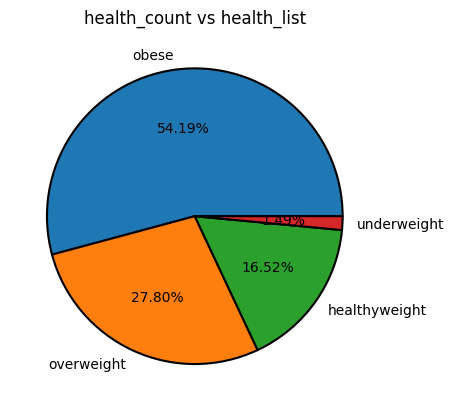

In [80]:
plt.pie(health_count,labels=health_list,autopct="%1.2f%%",wedgeprops={"ec":"k", "lw":1.5})
plt.title("health_count vs health_list" )
plt.show()

In [81]:
health_dt ={"underweight":1,"healthyweight":2,"overweight":3,"obese":4}

In [82]:
df["weight"]=df["weight"].map(health_dt)

In [83]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [84]:
final_data = pd.get_dummies(df).astype(int)
final_data

,age,sex,bmi,children,smoker,charges,weight,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,4,0,1,0,0
1334,18,0,31,0,0,2205,4,1,0,0,0
1335,18,0,36,0,0,1629,4,0,0,1,0
1336,21,0,25,0,0,2007,3,0,0,0,1


<h1>13. Dividing data into x and y</h1>

In [85]:
x=final_data.drop("charges",axis="columns")
x

,age,sex,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,3,0,0,0,1
1,18,1,33,1,0,4,0,0,1,0
2,28,1,33,3,0,4,0,0,1,0
3,33,1,22,0,0,2,0,1,0,0
4,32,1,28,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,4,0,1,0,0
1334,18,0,31,0,0,4,1,0,0,0
1335,18,0,36,0,0,4,0,0,1,0
1336,21,0,25,0,0,3,0,0,0,1


In [86]:
y=final_data['charges']
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

<h1>14. Training and testing by Linear regression</h1>

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lg = LinearRegression()

In [91]:
lg.fit(x_train,y_train)

LinearRegression()

In [92]:
print("Training Score by Linear regression",round(lg.score(x_train,y_train)*100,2))
print("Training Score by Linear regression",round(lg.score(x_test,y_test)*100,2))

Training Score by Linear regression 75.37
Training Score by Linear regression 74.83


<h1>15. Training and testing by using Decision tree and Random forest
 </h1>

In [93]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [94]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [95]:
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()
# using default parameters

In [96]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [97]:
print("Training Score by Decision Tree",round(dtr.score(x_train,y_train)*100,2))
print("Testing Score by Decision Tree",round(dtr.score(x_test,y_test)*100,2))

Training Score by Decision Tree 99.71
Testing Score by Decision Tree 68.16


In [98]:
rdmfr.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
print("Training Score by Random Forest",round(rdmfr.score(x_train,y_train)*100,2))
print("Testing Score by Random Forest",round(rdmfr.score(x_test,y_test)*100,2))

Training Score by Random Forest 97.51
Testing Score by Random Forest 82.3


In [100]:
x_test.shape,y_test.shape

((268, 10), (268,))

<h1>16.Score Evaluation</h1>
<p>Accuracy and Score should be high.<br>
Random forest algorithm is leading overfitting .<br>
They are trained by default arguments.<br>
Difference should be low.<br></p>

In [101]:
# Training Score by Random Forest 97.77
# Testing Score by Random Forest 80.71

# Training Score by Decision Tree 99.8
# Testing Score by Decision Tree 72.35

# Training Score by Linear regression 75.74
# Training Score by Linear regression 72.29

<h1>17. Prediction of Trained data</h1>

In [102]:
prediction_linear = lg.predict(x_test)
prediction_Decisiontree = dtr.predict(x_test)
prediction_RandomForest = rdmfr.predict(x_test)

In [103]:
comparison_df = pd.concat([x_test,y_test],axis=1)
comparison_df

,age,sex,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest,charges
966,51,1,24,2,1,2,0,1,0,0,23967
899,19,0,22,0,0,2,0,1,0,0,2117
551,32,0,28,0,0,3,0,0,1,0,3972
261,20,0,26,1,1,3,0,0,1,0,17085
273,50,1,27,1,0,3,1,0,0,0,9617
...,...,...,...,...,...,...,...,...,...,...,...
31,18,0,26,0,0,3,1,0,0,0,2198
703,34,0,26,1,0,3,0,1,0,0,5385
410,19,1,17,0,0,1,0,1,0,0,1621
117,29,0,27,1,1,3,0,0,1,0,19107


In [104]:
comparison_df["linear_prediction"]= prediction_linear
comparison_df["Decisiontree_prediction"]= prediction_Decisiontree
comparison_df["RandomForest_prediction"]= prediction_RandomForest

In [105]:
comparison_df.head()

,age,sex,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest,charges,linear_prediction,Decisiontree_prediction,RandomForest_prediction
966,51,1,24,2,1,2,0,1,0,0,23967,33176.868128,22218.0,23151.810000
899,19,0,22,0,0,2,0,1,0,0,2117,-374.115912,1607.0,1999.700000
551,32,0,28,0,0,3,0,0,1,0,3972,4684.640948,3757.0,4197.510000
261,20,0,26,1,1,3,0,0,1,0,17085,26122.533531,26125.0,20592.133333
273,50,1,27,1,0,3,1,0,0,0,9617,10588.374090,10106.0,14031.570000


<h1>18.Saving the trained and predicted dataframe.</h1>

In [106]:
comparison_df.to_csv("prediction.csv",index = False)

<h1>19. To improve the performance of model or algorithm.</h1>
<p> 1. Change your data preprocessing<br>
2. Get sufficient amount of data<br>
3. Change your algorithm<br>
4. Perform hyper parameter tunning instead of default parameters<br>
5. Generative</p>

<h1>20. Assignment</h1>

In [123]:
df.head()

,age,sex,children,smoker,region,charges,weight
0,19,0,0,1,southwest,16884.92400,3
1,18,1,1,0,southeast,1725.55230,4
2,28,1,3,0,southeast,4449.46200,4
3,33,1,0,0,northwest,21984.47061,2
4,32,1,0,0,northwest,3866.85520,3


In [125]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [130]:
region_list = ["southeast","southwest","northwest","northeast"]
region_list

['southeast', 'southwest', 'northwest', 'northeast']

In [128]:
region_count = df["region"].value_counts().values
region_count

array([364, 325, 325, 324])

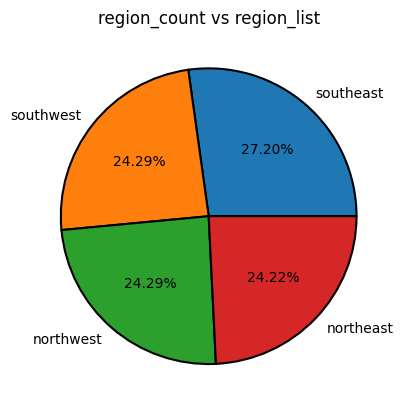

In [131]:
plt.pie(region_count,labels=region_list,autopct="%1.2f%%",wedgeprops={"ec":"k","lw":1.5})
plt.title("region_count vs region_list")
plt.show()

In [126]:
region_dt ={"northeast":1,"northwest":2,"southwest":3,"southeast":4}
df["region"]=df["region"].map(region_dt)

In [127]:
df.head()

,age,sex,children,smoker,region,charges,weight
0,19,0,0,1,3,16884.92400,3
1,18,1,1,0,4,1725.55230,4
2,28,1,3,0,4,4449.46200,4
3,33,1,0,0,2,21984.47061,2
4,32,1,0,0,2,3866.85520,3


In [132]:
x=df.drop("charges",axis=1)
x.head()

,age,sex,children,smoker,region,weight
0,19,0,0,1,3,3
1,18,1,1,0,4,4
2,28,1,3,0,4,4
3,33,1,0,0,2,2
4,32,1,0,0,2,3


In [133]:
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [140]:
lr= LinearRegression()
dr =DecisionTreeRegressor()
rfr =RandomForestRegressor()

In [141]:
lr.fit(x_train,y_train)
dr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
print("Training Score of linear regression",round(lr.score(x_train,y_train)*100,2))
print("Testing Score of linear regression",round(lr.score(x_test,y_test)*100,2))

print("Training Score of Decision Tree Regressor",round(dr.score(x_train,y_train)*100,2))
print("Testing Score of DecisionnTree Regressor",round(dr.score(x_test,y_test)*100,2))

print("Training Score of Random Forest Regressor",round(rfr.score(x_train,y_train)*100,2))
print("Testing Score of Random Forest Regressor",round(rfr.score(x_test,y_test)*100,2))


Training Score of linear regression 73.94
Testing Score of linear regression 79.34
Training Score of Decision Tree Regressor 97.92
Testing Score of DecisionnTree Regressor 82.63
Training Score of Random Forest Regressor 95.84
Testing Score of Random Forest Regressor 86.95


In [143]:
linearPrediction=lr.predict(x_test)
DecisionTreePrediction=dr.predict(x_test)
RandomForestPrediction=rfr.predict(x_test)

In [148]:
comparison_df2 = pd.concat([x_test,y_test],axis=1)
comparison_df2

,age,sex,children,smoker,region,weight,charges
874,44,1,3,0,1,2,8891.13950
1073,54,0,2,0,1,3,12096.65120
58,53,0,1,1,4,2,23244.79020
106,19,0,1,0,3,3,2331.51900
350,57,0,0,0,2,2,11830.60720
...,...,...,...,...,...,...,...
452,24,1,0,0,3,2,1969.61400
1078,28,1,0,1,4,4,34672.14720
547,54,0,2,0,3,4,11538.42100
1106,49,0,0,0,2,4,8988.15875


In [149]:
comparison_df2["linear_Prediction"]= linearPrediction
comparison_df2["DecisionTree_Prediction"]= DecisionTreePrediction
comparison_df2["RandomForest_Prediction"]= RandomForestPrediction
comparison_df2.head()

,age,sex,children,smoker,region,weight,charges,linear_Prediction,DecisionTree_Prediction,RandomForest_Prediction
874,44,1,3,0,1,2,8891.1395,7523.833426,8302.53565,11656.464672
1073,54,0,2,0,1,3,12096.6512,12494.444518,11244.37690,15881.606760
58,53,0,1,1,4,2,23244.7902,32156.324756,22218.11490,22556.538109
106,19,0,1,0,3,3,2331.5190,2194.473267,1743.83950,2416.426558
350,57,0,0,0,2,2,11830.6072,9468.185490,11841.69940,11931.468289


In [150]:
comparison_df2.to_csv("prediction2_csv",index=False)